# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

Health Insurance Claim Analysis: Correlation between BMI of Diabetic Individuals and Their Insurance Claims

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Xuan Jiang
- Jiafeng Wu
- Yian He
- Muen Hsu
- Zixuan Zhai
- Jiaxi Lin

<a id='research_question'></a>
# Research Question

- Does diabetic individuals with higher BMI (Body Mass Index) more likely to have higher health insurance claim amounts?

Independent Variable: BMI of people with diabetes 
(Possible) Dependent Variable: Health Insurance Claim Amounts

<a id='background'></a>

## Background & Prior Work

In this project, we aim to investigate the correlation between the Body Mass Index (BMI) of diabetic individuals and their health insurance claim amounts. Insurance claim analysis helps insurance companies to detect fraud claims and predict future claims and risks. Moreover, by monitoring the historical claim data, insurance companies can create new insurance products to conform to new trends that are detected from the claim data to maximize company profits. In healthcare, there are various health factors and demographic factors that affect the claim amounts of an individual's health insurance, therefore, various customized health insurance plans are created by insurance companies to satisfy customers’ demands and optimize companies’ profits. The claim amount represents the sum of money that the insurance company pays to the beneficiary when the insurance reaches its maturity. Health insurance is a type of insurance that provides coverage for a portion of an individual's medical expenses. The extent of coverage provided by health insurance is determined by the specific conditions in the policy, governing the amount of expenses that will be reimbursed by the insurance company. When assessing an individual's eligibility for health-related insurance, insurance companies take various factors into consideration. One of these factors is Body Mass Index (BMI), which helps determine the person's risk of developing health issues.

Body mass index (BMI) is a measure of body fat based on height and weight. In accordance with the weight status categories defined by BMI, individuals with a BMI falling between 25 and 29.9 are categorized as overweight, while those with a BMI exceeding 30 are classified as obese. Increased rates of higher BMI have emerged as a major contributing factor to the growing incidence of diabetes[1]. Diabetes is a costly chronic disease occurs when the pancreas fails to produce sufficient insulin or when the body is unable to effectively utilize the insulin it generates[2]. In a study conducted by Khan et al., it was found that individuals who have been diagnosed with diabetes tend to spend $8941 more on medical expenses compared to those who do not have a diabetes diagnosis. Furthermore, the study observed that the compounded annual growth rate in per capita annual medical expenditures was approximately 9% higher among individuals with diabetes[3]. Evidence from Finkelstein et al. suggested obesity-related medical expenditures takes up 9.1 percent of total annual cost[4]. Due to the elevated health risks associated with higher BMI values, individuals with diabetes who also have higher BMI tend to have higher medical expenditures compared with others.

Previous studies focused on analyzing the relationship between diabetic status and medical expenditures, hoping to highlight the positive correlation between diabetes and the economic burden placed on them. In our study, we try to step further to investigate the possible correlation of the BMI of diabetics individuals with regard to the health insurance claim amounts.

1. ^ Rendell, M. S. (2023, Jan 29). Obesity and diabetes: The final frontier. Expert Review of Endocrinology & Metabolism, 18(1), 81–94. https://doi.org/10.1080/17446651.2023.2168643


2. [^](#cite_ref-2) World Health Organization. (2023, April 5). *Diabetes*. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/diabetes#:~:text=Diabetes%20is%20a%20chronic%20disease,hormone%20that%20 regulates%20blood%20 glucose.
3. [^](#cite_ref-3) Khan, T., Yang, J., & Wozniak, G. (2021, February 2). *Trends in medical expenditures prior to diabetes diagnosis: The early burden of diabetes*. Population health management. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7875131/
4. [^](#cite_ref-4) Eric A. Finkelstein, Ian C. Fiebelkorn, Guijing Wang (2003). National Medical Spending Attribute to Overweight and Obesity: How Much, and Who’s Paying? *Health Affairs, 22*(1). https://doi.org/10.1377/hlthaff.W3.219

# Dataset(s)

- Dataset Name: Health insurance data set
- Link to the dataset: https://www.kaggle.com/datasets/sureshgupta/health-insurance-data-set 
- Number of observations:15000

This dataset records the demographic factors, health conditions, and health insurance claim amounts for 15000 health insurance policy holders in the United States. We specifically foused on the column "diabetes", "bmi", and "claim". 

The column "diabetes" indicate whether the health insurance policy holder has diabetes or not. (Is diabetics = 1; non-diabetics = 0)

The column "bmi" indicates the general body condition of the policy holder, which is a ratio of height and weight. 

The column "claim" represents the amount (in dollars) claimed by the policy holder from the health insurance. 


# Ethics & Privacy

We chose to explore the relationship between diabetics with higher BMI (body mass index) and Medicare reimbursement amounts. The information we used in our study came from open access sources, which means that there are no ethical issues with the data itself. However, as it relates to human health, we need to consider the privacy issues involved. All data and contextual information used in our study were obtained from the authoritative website and journal Kaggle.com, a public database designed for the disciplines of data science and machine learning. Kaggle.com also makes sure we are accessed with appropriate usage filters. As an open access platform, Kaggle.com ensures that the datasets available for use are appropriately anonymized and comply with relevant privacy regulations. Therefore, the data we use complies with ethical guidelines and privacy regulations.

# Setup

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Data Wrangling


In [4]:
# import data
file  = '/Users/jiangxuan/Desktop/1651277648862_healthinsurance (1).csv'
df = pd.read_csv(file)
print(df.head())
df.shape

    age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  


(15000, 13)

In [5]:
graph_selected_columns = ['age', 'sex', 'weight', 'bmi', 'smoker', 'diabetes', 'claim']
graph_df = df.loc[:,graph_selected_columns]
print(graph_df.head())

    age     sex  weight   bmi  smoker  diabetes    claim
0  60.0    male      64  24.3       0         0  13112.6
1  49.0  female      75  22.6       0         1   9567.0
2  32.0  female      64  17.8       1         1  32734.2
3  61.0  female      53  36.4       1         1  48517.6
4  19.0  female      50  20.6       0         1   1731.7


In [6]:
# We are only working on a subset of this dataset
selected_columns = ['bmi', 'diabetes', 'claim']
sub_df = df.loc[:,selected_columns]
sub_df.head()

# We are only interested in the BMI and Claim data for diabetic individuals 
number_diabetic_individuals = sum(sub_df['diabetes'] == 1)
print(number_diabetic_individuals)

# Now we drop the rows of people who don't have diabetes 
rows_to_drop = sub_df.loc[sub_df['diabetes'] == 0].index
sub_df = sub_df.drop(rows_to_drop)
sub_df = sub_df.loc[:,['bmi','claim']]
print(sub_df)


11655
        bmi    claim
1      22.6   9567.0
2      17.8  32734.2
3      36.4  48517.6
4      20.6   1731.7
7      26.8   1534.3
...     ...      ...
14995  28.3  21082.2
14996  29.6   7512.3
14997  33.3   1391.5
14998  36.7   9144.6
14999  26.4  25992.8

[11655 rows x 2 columns]


# Data Cleaning

Describe your data cleaning steps here.

In [7]:

# Determine how many empty cells in the column "bmi，claim"
empty_cells_bmi = sub_df['bmi'].isnull().sum()
print(empty_cells_bmi)
empty_cells_claim = sub_df['claim'].isnull().sum()
print(empty_cells_claim)

# Determine how many rows that have no data in all columns 
empty_rows = sub_df.isnull().all(axis=1).sum()
print(empty_rows)



673
0
0


Filtering the Dataframe

In [8]:
# Remove the rows where all cells have missing data
cleaned_df = sub_df.dropna(how='all')
# Remove the rows where the cells in column "bmi" have missing data 
cleaned_df = cleaned_df[cleaned_df['bmi'].isnull()== False]
# Now we have a clean dataframe that only contains BMI and claim amounts of diabetic individuals 
cleaned_df

,bmi,claim
1,22.6,9567.0
2,17.8,32734.2
3,36.4,48517.6
4,20.6,1731.7
7,26.8,1534.3
...,...,...
14995,28.3,21082.2
14996,29.6,7512.3
14997,33.3,1391.5
14998,36.7,9144.6


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

- Descripitive Statistics 


In [9]:
cleaned_df.describe()

,bmi,claim
count,10982.000000,10982.000000
mean,30.532735,14139.657977
std,6.087261,12669.106924
min,16.000000,1121.900000
25%,25.900000,5148.600000
50%,29.600000,10118.400000
75%,34.700000,17942.100000
max,52.600000,63770.400000


# Univariate Quantitative EDA

- Claim Amount Distribution 

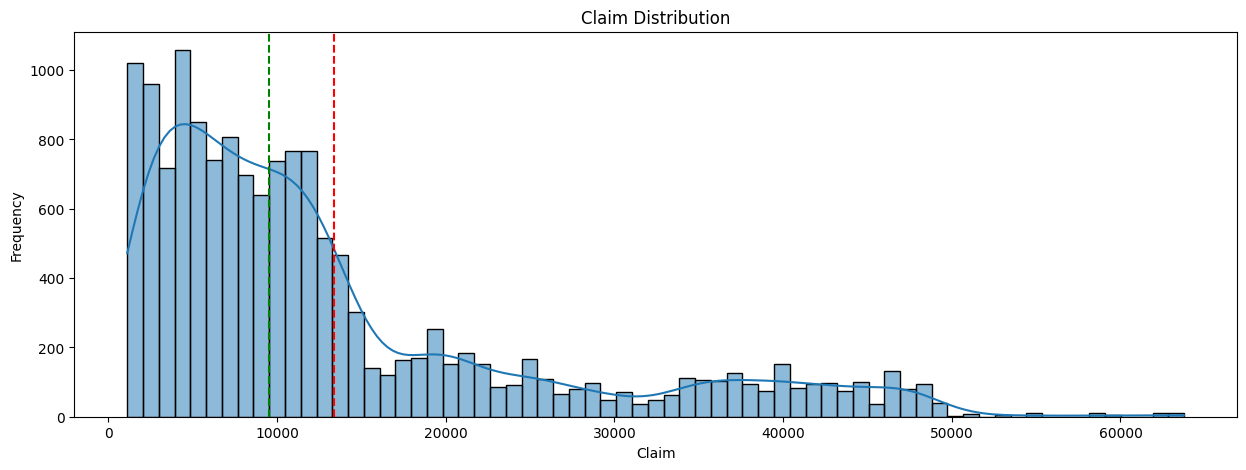

Skewness: 1.4978293015042263
Mean: 13401.43762
Median: 9545.650000000001


In [10]:
plt.figure(figsize=(15, 5))
sns.histplot(x='claim', data=graph_df, kde=True)
plt.axvline(graph_df.claim.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.claim.median(), color='g', linestyle='--', label='Median')
plt.title('Claim Distribution')
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {graph_df["claim"].skew()}')
print(f'Mean: {(graph_df["claim"].mean())}')
print(f'Median: {graph_df["claim"].median()}')

The graph above depicts the distribution of claim amounts among clients. On average, clients' claims amount to approximately 'dollar 13,401,' while the middle value stands at 9545.65 dollars. However, the distribution exhibits a right-skewed pattern, by a skewness value of 1.48, indicating that there are some clients with exceptionally high claim values, causing the right tail of the distribution to stretch further than the left tail, pulling the mean towards higher values while the median remains relatively lower.



- Age Distribution 

Text(0, 0.5, 'Frequency')

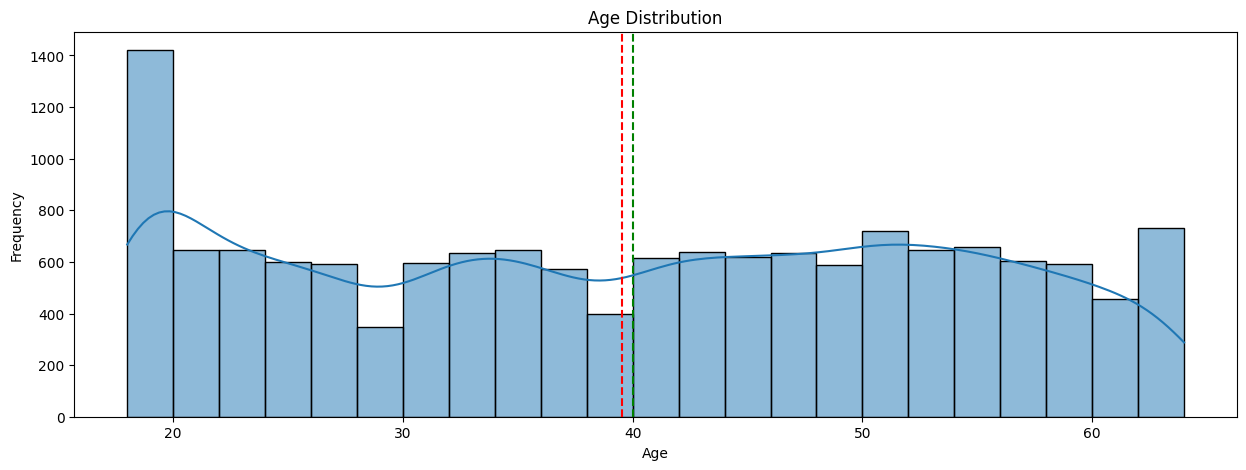

In [11]:
plt.figure(figsize=(15, 5))
sns.histplot(x='age', data=graph_df, kde=True)
plt.axvline(graph_df.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

The age distribution of clients is characterized by a nearly normal distribution, as indicated by a skewness value close to 0. This suggests that the data is relatively symmetrical, with a balanced spread of ages around the central tendency. Both the mean and median values are close to each other.
On average, clients' age is approximately 40 years old. The youngest client is 18 years old, while the oldest client is 64 years old.

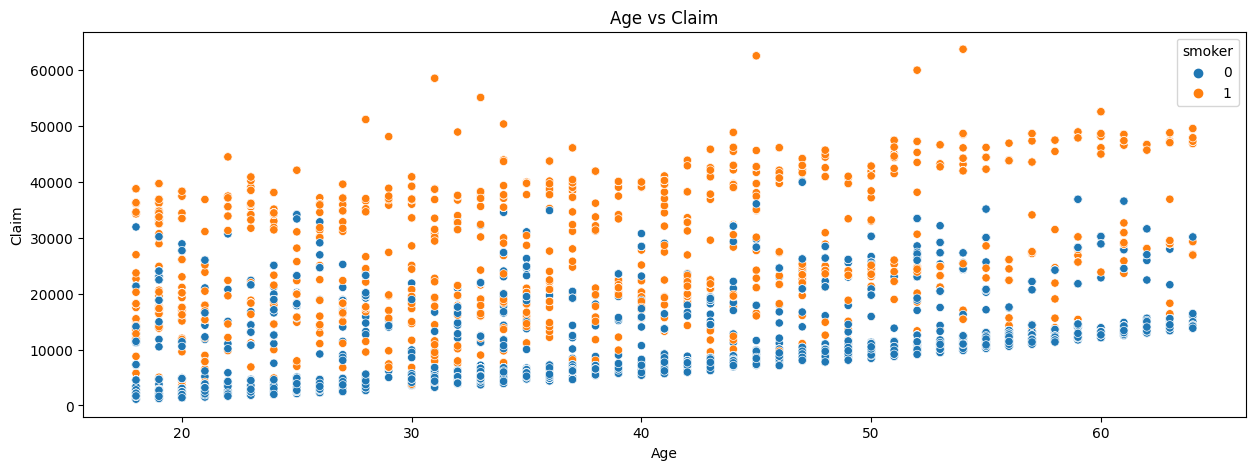

Skewness: 0.005576775986078496
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [12]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='age', y='claim', data=graph_df, hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {graph_df["age"].skew()}')
print(f'Mean: {(graph_df["age"].mean()):.0f}')
print(f'Median: {graph_df["age"].median()}')
print(f'Minimum Age: {graph_df["age"].min()}')
print(f'Maximum Age: {graph_df["age"].max()}')

Examining the scatter plot reveals a positive correlation between the age column and the claims column. This implies that as the clients' age increases, their claims also exhibit a tendency to increase. Additionally, the data distinctly shows that claims for smokers are considerably higher compared to those for non-smokers.

- Gender Distribution 

Text(0, 0.5, 'Count')

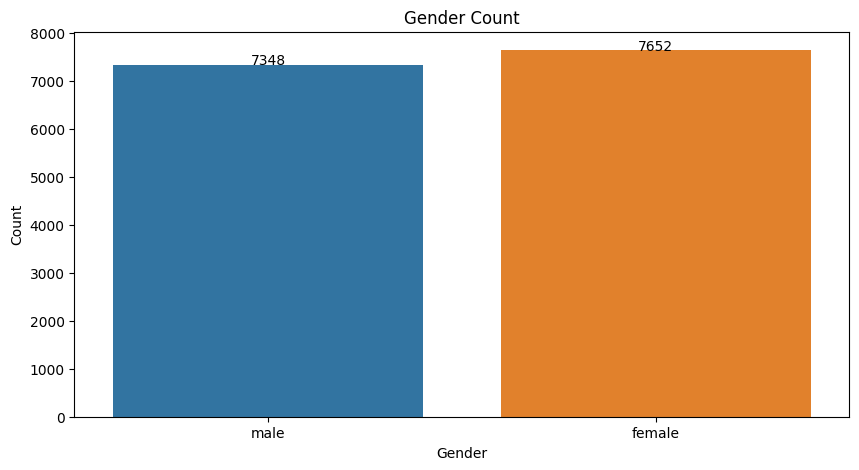

In [13]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x='sex', data=graph_df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

0        1
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: sex, Length: 15000, dtype: int64


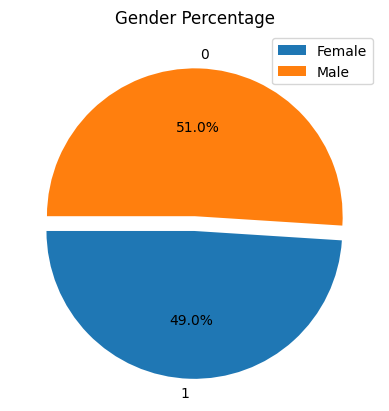

In [14]:

# Mapping dictionary for replacing female and male with 0 and 1
gender_mapping = {'female': 0, 'male': 1}
# Replace values in the 'sex' column in the cleaned dataframe
graph_df['sex']=graph_df['sex'].map(gender_mapping)
print(graph_df['sex'])
# Creating a pie chart to visualize the porportions of each gender in this dataset
plt.pie(graph_df.sex.value_counts().reindex([1, 0]), labels=graph_df.sex.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Gender Percentage')
# Add legends 
plt.legend(labels=['Female', 'Male'])
plt.show()



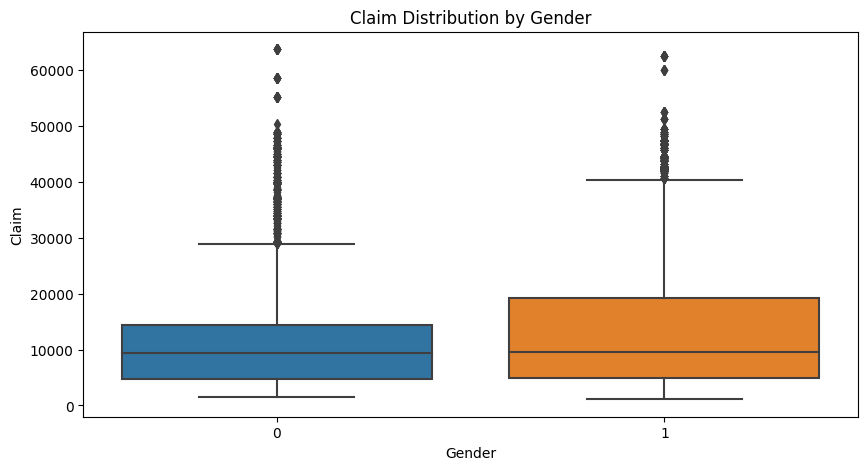

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='sex', y='claim', data=graph_df)
plt.title('Claim Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()

In [16]:
round(graph_df.groupby('sex').claim.mean(), 0).reset_index()

,sex,claim
0,0,12692.0
1,1,14140.0


The distribution of female and male clients does not show a significant difference. There are 7348 (49%) male clients and 7652 (51%) female clients.

- BMI Distribution 

Text(0, 0.5, 'Frequency')

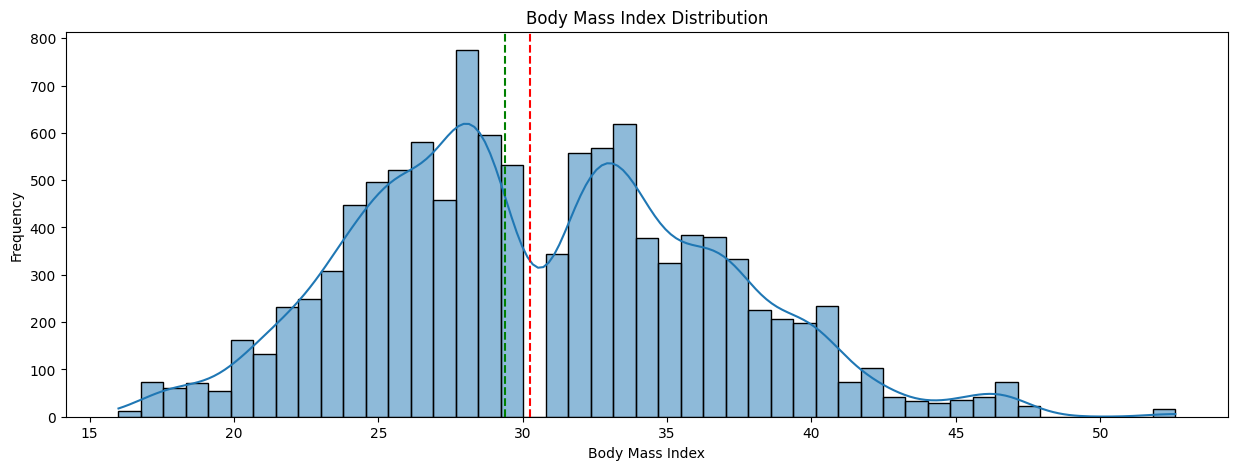

In [17]:
plt.figure(figsize=(15, 5))
sns.histplot(x='bmi', data=cleaned_df, kde=True)
plt.axvline(graph_df.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')

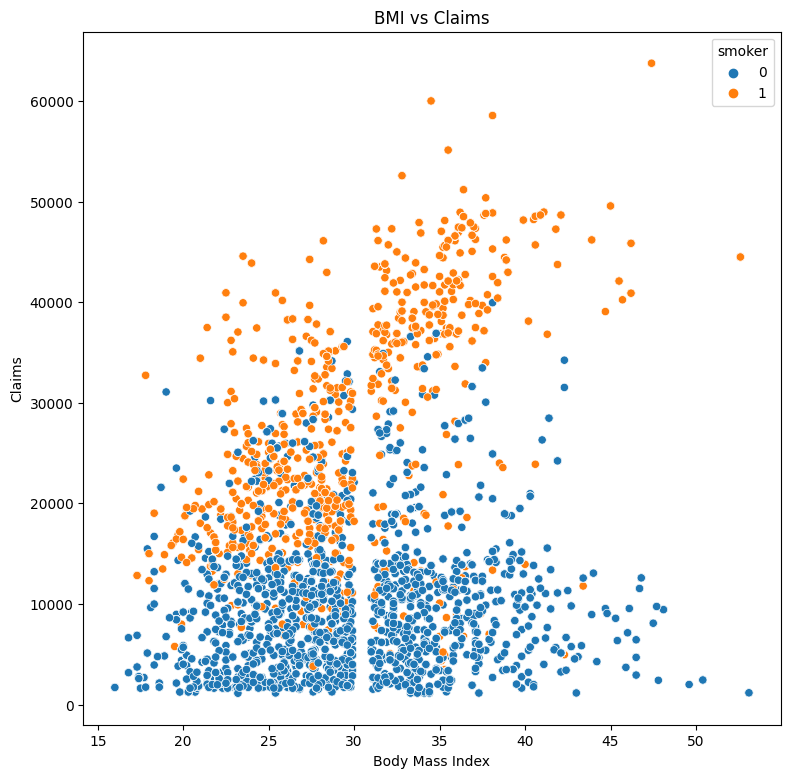

Skewness: 0.3752585894901583
Mean: 30.266412702933636
Median: 29.4


In [18]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x='bmi', y='claim', data=graph_df, hue='smoker')
plt.title('BMI vs Claims')
plt.xlabel('Body Mass Index')
plt.ylabel('Claims')
plt.show()
print(f'Skewness: {graph_df["bmi"].skew()}')
print(f'Mean: {(graph_df["bmi"].mean())}')
print(f'Median: {graph_df["bmi"].median()}')

Clients have a mean Body Mass Index (BMI) of approximately 30.27 kg/m². The distribution of BMI follows a bimodal pattern. There are very few outliers in this column. Analyzing the scatter plot, we observe a weak positive correlation between the BMI parameter and the charges column. This indicates that for non-smoker customers, the increase in claims is not significantly influenced by their BMI. However, for smoker clients, there is a clear positive correlation. In other words, as their body mass index increases, their claims tend to be higher.

Text(0.5, 1.0, 'Smoker Percentage')

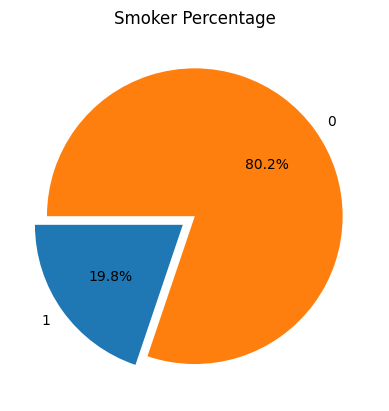

In [19]:
plt.pie(graph_df.smoker.value_counts().reindex([1, 0]), labels=graph_df.smoker.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')

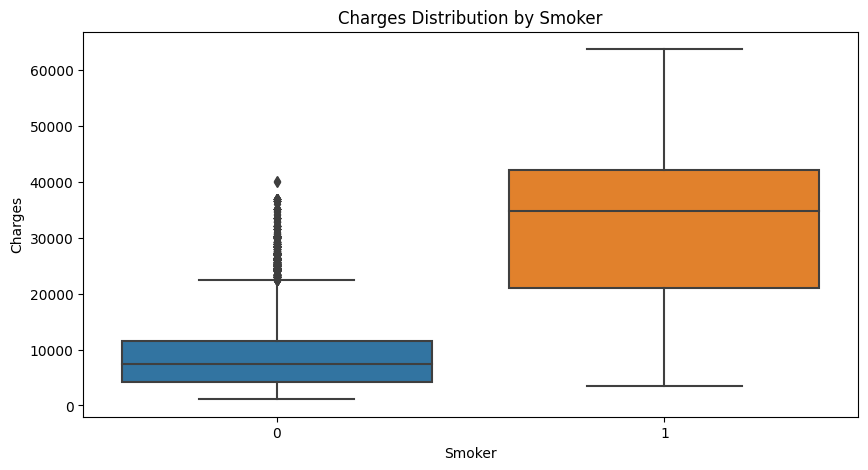

Average Charges for Smokers: $32302
Average Charges for Non-Smokers: $8731


In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='smoker', y='claim', data=graph_df)
plt.title('Charges Distribution by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
print(f"Average Charges for Smokers: ${(graph_df[graph_df.smoker == 1].claim.mean()):.0f}")
print(f"Average Charges for Non-Smokers: ${(graph_df[graph_df.smoker == 0].claim.mean()):.0f}")

Smokers make up only around 20% of all claims. Despite constituting a relatively small proportion, smokers bear a substantial cost, with an average payment of approximately dollar 32,302 per claim. In contrast, non-smokers, who represent a larger portion of claimants, pay significantly less on average, around dollar 8,731 per claim.

# Bivariate Quantitative EDA

In [21]:
# Generate a matrix that shows the correlation between bmi measures and claim amount
correlation_matrix = cleaned_df.corr()
print(correlation_matrix)

            bmi     claim
bmi    1.000000  0.238034
claim  0.238034  1.000000


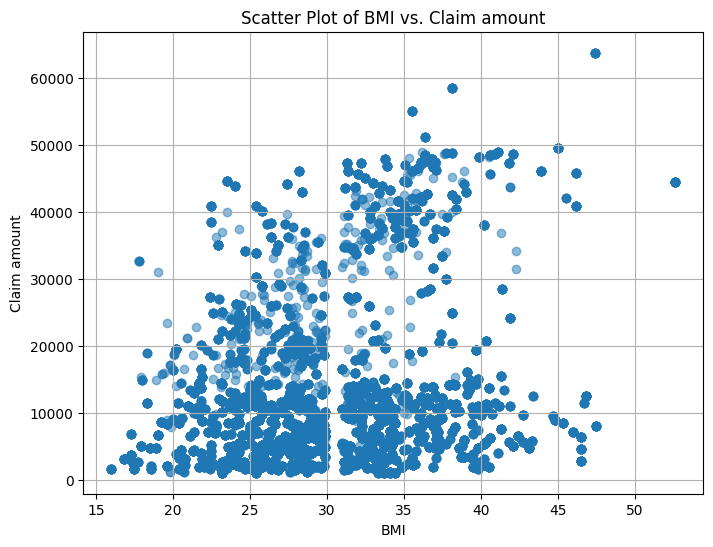

In [22]:
# Scatter plot to visualize the correlation 
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['bmi'], cleaned_df['claim'], alpha=0.5)

# Add legends
plt.xlabel('BMI')
plt.ylabel('Claim amount')
plt.title('Scatter Plot of BMI vs. Claim amount')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.056660317632580254


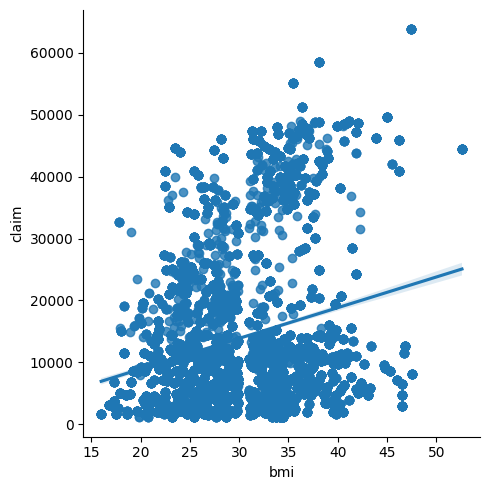

In [23]:
# Creates a scatter plot with the trend line
sns.lmplot(x='bmi', y='claim', data=cleaned_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df['bmi'], cleaned_df['claim'])

# Calculates R-squared value 
r_squared = r_value ** 2

print("R-squared value:", r_squared)

Log Transformation:
The dependent variable (insurance claim amount) is positively skewed. Log transformation can help stabilize the variance and make the relationship more linear. It also helps reduce the impact of outliers.

In [24]:
# Log transformation of claim amounts
cleaned_df['claim_log'] = np.log(cleaned_df['claim'])

print(cleaned_df)

        bmi    claim  claim_log
1      22.6   9567.0   9.166075
2      17.8  32734.2  10.396176
3      36.4  48517.6  10.789682
4      20.6   1731.7   7.456859
7      26.8   1534.3   7.335830
...     ...      ...        ...
14995  28.3  21082.2   9.956184
14996  29.6   7512.3   8.924297
14997  33.3   1391.5   7.238138
14998  36.7   9144.6   9.120919
14999  26.4  25992.8  10.165575

[10982 rows x 3 columns]


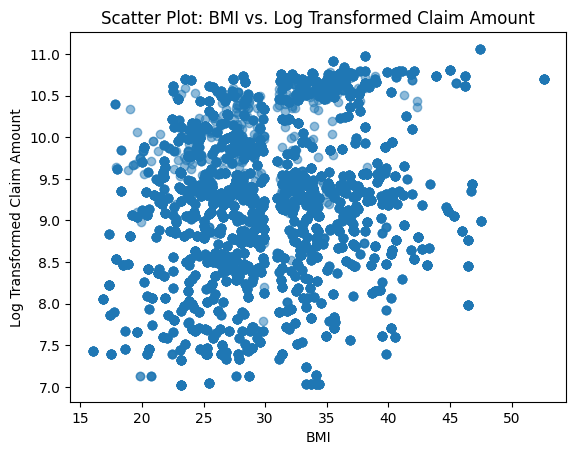

In [25]:
# Scatter plot of bmi and log transformed claim amount 
plt.scatter(cleaned_df['bmi'],cleaned_df['claim_log'],alpha=0.5)

# Add legends
plt.xlabel('BMI')
plt.ylabel('Log Transformed Claim Amount')
plt.title('Scatter Plot: BMI vs. Log Transformed Claim Amount')

plt.show()

The scatter plot above shows no obvious correlation between the two variables. A trendline and R-squared value are used as followed for better clarity.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.04824696073671382


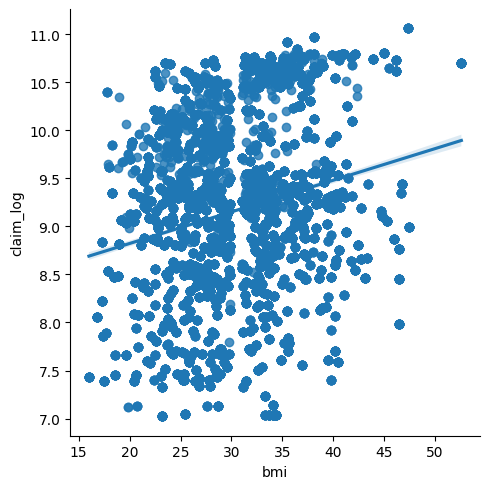

In [26]:
# Insert trendline
sns.lmplot(x='bmi', y='claim_log',data=cleaned_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df['bmi'], cleaned_df['claim_log'])

# Calculates R-squared value
r_squared = r_value ** 2
print("R-squared value:", r_squared)

The weak trendline and small r^2 value confrimed that the correlation between the two variables is weak. So we decided to take a look at other variables that may affect insurance claim amount.

               age       sex    weight       bmi    smoker  diabetes     claim
age       1.000000  0.013461  0.285646  0.188336 -0.019627  0.070641  0.301158
sex       0.013461  1.000000  0.159249  0.077478  0.073981 -0.012622  0.059592
weight    0.285646  0.159249  1.000000  0.251649  0.015499 -0.010490  0.077716
bmi       0.188336  0.077478  0.251649  1.000000  0.023631  0.082376  0.206588
smoker   -0.019627  0.073981  0.015499  0.023631  1.000000  0.058164  0.773399
diabetes  0.070641 -0.012622 -0.010490  0.082376  0.058164  1.000000  0.135371
claim     0.301158  0.059592  0.077716  0.206588  0.773399  0.135371  1.000000


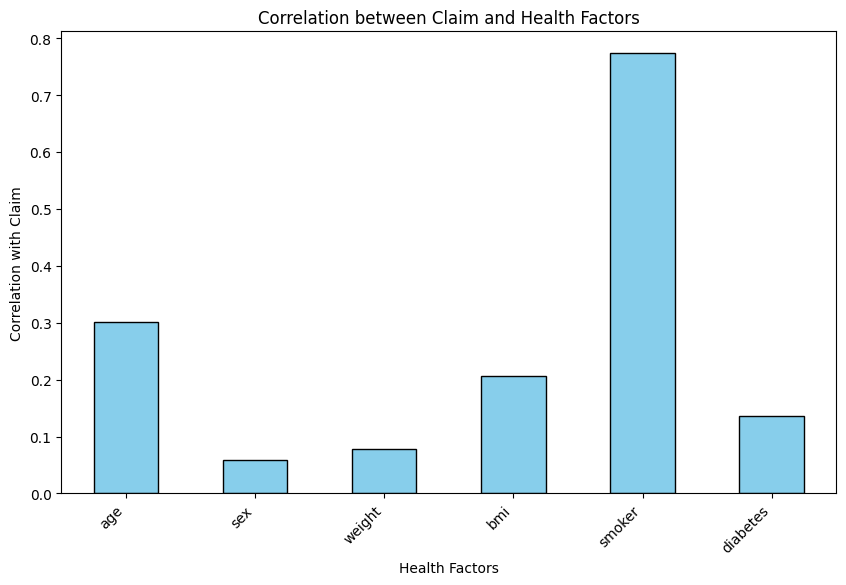

In [27]:
# Generate a matrix that shows the correlation between every two variables
correlation_all = graph_df.corr()
print(correlation_all)

# Visualize the correlation between health factors and claim amount using a bar plot
correlations = graph_df.corr()['claim'].drop('claim')  
plt.figure(figsize=(10, 6))

# Add legends
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Health Factors')
plt.ylabel('Correlation with Claim')
plt.title('Correlation between Claim and Health Factors')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels 

plt.show()

We found out that smoking habbit has a strong effect on claim amount after filtering out the dataframe again.
So we decided to dig deeper into the correlation between bmi measures of diabetic smokers and their claim amount.

In [28]:
# Clean dataframe again to focus on desired variables
new_selected_columns = ['bmi','smoker','diabetes','claim']
sub_df2 = df.loc[:,new_selected_columns]
sub_df2.head()

# Drop non-diabetic individuals
rows_to_drop2 = sub_df2.loc[sub_df2['diabetes']==0].index
sub_df2 = sub_df2.drop(rows_to_drop2)
sub_df2 = sub_df2.loc[:,['bmi','smoker','claim']]
print(sub_df2)

# Drop non-smokers 
rows_to_drop3 = sub_df2.loc[sub_df2['smoker']==0].index
sub_df2 = sub_df2.drop(rows_to_drop3)
sub_df2 = sub_df2.loc[:,['bmi','claim']]
print(sub_df2)

# Filter the data
cleaned_df2 = sub_df2[sub_df2['bmi'].isnull()== False]

print(cleaned_df2)

# Cleaned_df2 will now be used to perform new EDA

        bmi  smoker    claim
1      22.6       0   9567.0
2      17.8       1  32734.2
3      36.4       1  48517.6
4      20.6       0   1731.7
7      26.8       0   1534.3
...     ...     ...      ...
14995  28.3       1  21082.2
14996  29.6       0   7512.3
14997  33.3       0   1391.5
14998  36.7       0   9144.6
14999  26.4       0  25992.8

[11655 rows x 3 columns]
        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14971  27.3  18223.5
14977   NaN  39725.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2454 rows x 2 columns]
        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14965  28.3  21082.2
14971  27.3  18223.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2289 rows x 2 columns]


In [29]:
# Generate a matrix that shows the correlation between the two variables
cleaned_df2.corr()

,bmi,claim
bmi,1.000000,0.720731
claim,0.720731,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.5194524751171467


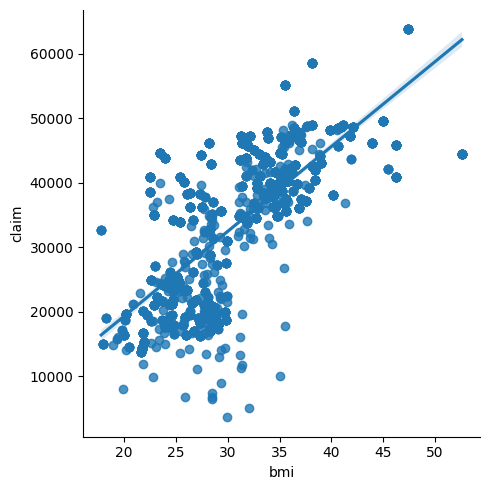

In [30]:
# Create a scatter plot with the trend line
sns.lmplot(x='bmi', y='claim', data=cleaned_df2)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df2['bmi'], cleaned_df2['claim'])

# Calculate R-squared value
r_squared = r_value ** 2

print("R-squared value:", r_squared)

Scattor plot and r^2 value of 0.5 shows a much stronger correlation compared to the ones before!

In [31]:
cleaned_df2['claim_log2'] = np.log(cleaned_df2['claim'])
print(cleaned_df2)

        bmi    claim  claim_log2
2      17.8  32734.2   10.396176
3      36.4  48517.6   10.789682
10     33.0  44400.4   10.701004
24     25.7  17942.1    9.794905
27     38.4  41949.2   10.644215
...     ...      ...         ...
14965  28.3  21082.2    9.956184
14971  27.3  18223.5    9.810467
14983  38.4  40419.0   10.607055
14990  36.0  42124.5   10.648385
14995  28.3  21082.2    9.956184

[2289 rows x 3 columns]


/var/folders/tc/pbz4y6wd0g7chz6vr038tb840000gn/T/ipykernel_53489/695040079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2['claim_log2'] = np.log(cleaned_df2['claim'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.47240972496181904


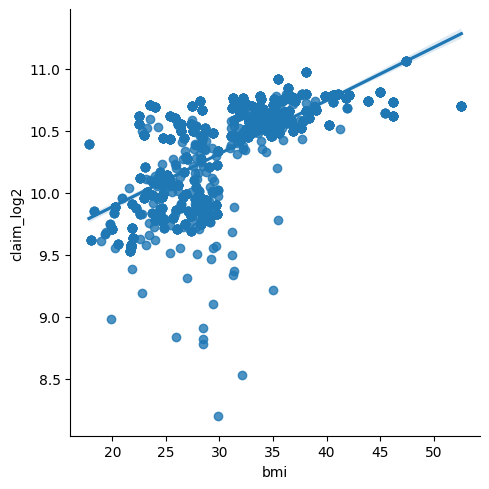

In [32]:
# Create the scatter plot with the trend line
sns.lmplot(x='bmi', y='claim_log2',data=cleaned_df2)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df2['bmi'], cleaned_df2['claim_log2'])

# Calculate R-squared value
r_squared = r_value ** 2
print("R-squared value:", r_squared)

It is shown in the scatter plot above that there are many outliers on the bottom part.

In [33]:
# Now we split the data into two parts --> above and below 15000
below_15000 = cleaned_df2.loc[cleaned_df2['claim'] < 15000].index
cleaned_df2 = cleaned_df2.drop(below_15000)
above15000_df = cleaned_df2.loc[:,['bmi','claim']]

print(above15000_df)

        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14965  28.3  21082.2
14971  27.3  18223.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2228 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.5108481786917564


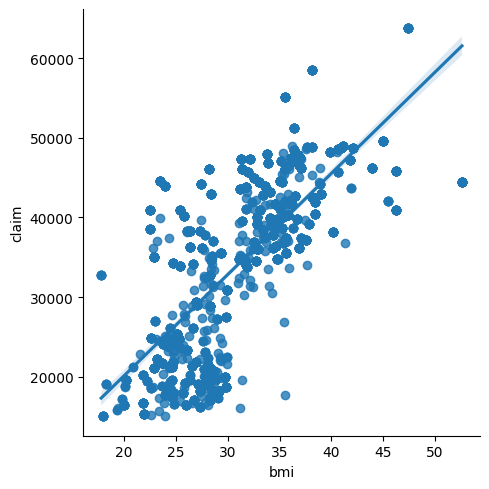

In [34]:
# Create the scatter plot with the trend line
sns.lmplot(x='bmi', y='claim',data=above15000_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(above15000_df['bmi'], above15000_df['claim'])

# Calculate R-squared value
r_squared = r_value ** 2
print("R-squared value:", r_squared)

In [35]:
# Conclusion & Discussion

- Results 

In this project, we used visual data patterns to explore the relationship between Body Mass Index (BMI) of people with diabetes and the amount of their health insurance claims. Initially, we chose variables such as age, sex, weight, BMI, and diabetes, but we found no significant correlation among them. However, when we added the variable of smoking and examined its effect on health insurance claims, an interesting pattern emerged. We discovered that individuals with both a high BMI and a smoking habit tended to have the highest health insurance claims. The R-squared value is a key metric to determine whether this factor has any effect on the amount of health insurance claims, and it was found to be 0.5108. This suggests that smoking may be a crucial factor contributing to increased healthcare costs for individuals with higher BMI values, regardless of whether they have diabetes.
- Limitations and Future Studies 

Our research is based on data gathered from secondary sources, leading to limitations and potential biases in the analysis. We cannot fully verify the accuracy and real-life circumstances of the information obtained from each individual, as highly private data is involved. Therefore, our findings may not be fully representative of real-life situations among diabetic individuals in the United States. The restricted access to comprehensive and first-hand individual-level data and the temporal limitations of historical data may further impact the precision and generalizability of our results. Despite these challenges,
our research contributes valuable insights into potential correlations between BMI, diabetic status, and health insurance claim amounts. We urge cautious interpretation of the findings and recommend future studies with more extensive and diverse datasets to enhance accuracy and understanding in this field while maintaining data accuracy and privacy protection in healthcare research. For future research, our goal is to acquire firsthand data from a more extensive and diverse sample of patients across the United States, encompassing a broader range of demographics. By doing so, we aim to gain a more comprehensive understanding of the intricate relationship between BMI, diabetes, personal habits, and health insurance claim amounts. Additionally, we aspire to expand our research beyond the United States and include international data to gain a global perspective and provide a clearer insight into our findings. Gathering data from various regions and populations will enable us to better assess the impact of different healthcare systems, cultural factors, and lifestyle habits on health insurance claim amounts, ultimately enhancing the applicability and relevance of our research findings.